# Notebook to parse the Feb 6 data from Arduino and SQM sensors

## Setting UP
 * Imports
 * Mounting google drive. **Important:** in this part you need to set the correct `indrivefolder` folder.

In [1]:
### Imports
# Get pylab for plots
%pylab inline
# This parses the paths
import glob

# This is an astronomy package that is pretty convenient for i/o
import astropy.table

# Operating Syste library
import os, sys

# Regexp library
import re

# Time
import time

Populating the interactive namespace from numpy and matplotlib


In [2]:
### Setup google drive
#   IMPORTANT: Change these values to fit your google drive setup
from google.colab import drive

mountfolder = "/content/drive"
indrivefolder = "My Drive/LENSS/Data/Sensors Data/2020-03-30"
drive.mount(mountfolder)

Mounted at /content/drive


## Getting the Files
 * Search for the files
 * Get the date and time0 (in [Unix Time](https://en.wikipedia.org/wiki/Unix_time]) )
 * Making a function to clear the units of the data

In [ ]:
### Get the data files
searchpath = os.path.join(mountfolder, indrivefolder, "*.txt")
print("looking for files in %s" % searchpath)
fnames = glob.glob(searchpath)
print("Found Files:")
for fnam in fnames:
    print("  " + fnam)

looking for files in /content/drive/My Drive/LENSS/Data/Sensors Data/2020-03-30/*.txt
Found Files:


In [ ]:
# Get the date string from the filename
fnameonly = os.path.split(fnames[0])[1]
datestr = re.search(r"[0-9]+-[0-9]+-[0-9]+", fnameonly).group()
# get unix time at midnight
tmtime = time.strptime(datestr, "%Y-%m-%d")
time0 = time.mktime(tmtime)
print(fnameonly, datestr, time0)

IndexError: ignored

In [ ]:
# Each row is a string and has several parts with units.
# We split each string in value and units and get rid of the units
def get_rid_of_units(s):
    for i, c in enumerate(s):
        if (c.isdigit() == False) & (c != " ") & (c != "."):
            return float(s[:i])

In [ ]:
# Test the function
print(get_rid_of_units("  0.33,0000062002Hz"))
print(float(re.match(r"\s*[0-9]+\.?[0-9]*", "  3.1415Pies,").group()))

0.33
3.1415


## For SQM: Load the data into an astropy Table
 * Load the data file into pandas object
 * Make a dictionary and put the data into it
 * Change it into an astropy table

In [ ]:
# Load data with pandas (thx to Javier)
# We are going to read with Pandas
import pandas as pd

# Load the data in a list of tables (one table for each file)
tab = []
for fname in fnames:
    tab.append(pd.read_table(fname, names="t"))
print(tab[0])

                                                       t
0      00:00:00,r, 17.77m,0000000007Hz,0000064360c,00...
1      00:00:01,r, 17.78m,0000000007Hz,0000065014c,00...
2      00:00:02,r, 17.77m,0000000007Hz,0000064388c,00...
3      00:00:03,r, 17.78m,0000000007Hz,0000065015c,00...
4      00:00:04,r, 17.77m,0000000007Hz,0000064465c,00...
...                                                  ...
81357  23:59:55,r, 17.76m,0000000007Hz,0000064005c,00...
81358  23:59:56,r, 17.76m,0000000007Hz,0000063753c,00...
81359  23:59:57,r, 17.76m,0000000008Hz,0000064150c,00...
81360  23:59:58,r, 17.76m,0000000008Hz,0000064226c,00...
81361  23:59:59,r, 17.77m,0000000007Hz,0000064282c,00...

[81362 rows x 1 columns]


In [ ]:
# We are going to dump the data into a dictionary and then convert to astropy table
data = dict()
# The keys of the dictionary are going to be the name of the columns
keys = ["time", "col1", "freq", "col3", "col4", "temp"]
# Initialize the dictionary with empty lists for each key
for key in keys:
    data[key] = []
# Now we parse the SQM file
flag = True
for row in tab[0][1::2]["t"].values:
    # Split the line
    csvalues = row.split(",")
    # Ignore if too short
    if len(csvalues) < len(keys):
        continue
    # Get all elements
    for i, val in enumerate(csvalues):
        # Get time
        if not i:
            datimestr = datestr + " " + val
            tmtime = time.strptime(datimestr, "%Y-%m-%d %H:%M:%S")
            sectime = time.mktime(tmtime)
            data[keys[0]].append(sectime)
        elif i > 1:
            data[keys[i - 1]].append(get_rid_of_units(val))
    if flag and len(data["time"]) != len(data["col1"]):
        print(row, csvalues)
        flag = False
print("All Done")

All Done


In [ ]:
# Look at data
for r in data:
    print(r, len(data[r]), data[r][5:])

time 40681 [1585526412.0, 1585526414.0, 1585526416.0, 1585526418.0, 1585526420.0, 1585526422.0, 1585526426.0, 1585526428.0, 1585526431.0, 1585526433.0, 1585526435.0, 1585526437.0, 1585526439.0, 1585526441.0, 1585526443.0, 1585526446.0, 1585526448.0, 1585526450.0, 1585526452.0, 1585526454.0, 1585526456.0, 1585526458.0, 1585526460.0, 1585526462.0, 1585526464.0, 1585526466.0, 1585526468.0, 1585526470.0, 1585526473.0, 1585526475.0, 1585526477.0, 1585526479.0, 1585526481.0, 1585526483.0, 1585526485.0, 1585526487.0, 1585526489.0, 1585526491.0, 1585526493.0, 1585526495.0, 1585526498.0, 1585526500.0, 1585526502.0, 1585526504.0, 1585526507.0, 1585526509.0, 1585526511.0, 1585526513.0, 1585526515.0, 1585526517.0, 1585526519.0, 1585526522.0, 1585526525.0, 1585526527.0, 1585526529.0, 1585526531.0, 1585526533.0, 1585526535.0, 1585526537.0, 1585526539.0, 1585526541.0, 1585526544.0, 1585526546.0, 1585526548.0, 1585526550.0, 1585526552.0, 1585526554.0, 1585526556.0, 1585526558.0, 1585526560.0, 15855265

In [ ]:
# And dump it into a table
tab2 = astropy.table.Table(data)

In [ ]:
tab2

time,col1,freq,col3,col4,temp
float64,float64,float64,float64,float64,float64
1585526401.0,17.78,7.0,65014.0,0.141,3.5
1585526403.0,17.78,7.0,65015.0,0.141,3.5
1585526405.0,17.77,7.0,64511.0,0.14,3.5
1585526407.0,17.78,7.0,65105.0,0.141,3.5
1585526409.0,17.78,7.0,65249.0,0.142,3.5
1585526412.0,17.79,7.0,65323.0,0.142,3.5
1585526414.0,17.79,7.0,65405.0,0.142,3.5
1585526416.0,17.79,7.0,65480.0,0.142,3.5
1585526418.0,17.8,7.0,66282.0,0.144,3.5


In [ ]:
# Optional: And write as csv
tab2.write("Feb6_2020_data_SLQM.csv", format="ascii.csv")

NameError: ignored

### Plot the SQM Data

Text(0, 0.5, 'Frequency [Hz]')

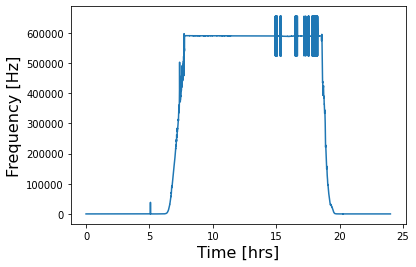

In [ ]:
# Check the values
plt.figure(figsize=(6, 4))
plt.plot((tab2["time"] - time0) / 3600, tab2["freq"])
plt.xlabel("Time [hrs]", fontsize=16)
plt.ylabel("Frequency [Hz]", fontsize=16)
# plt.loglog()

Text(0, 0.5, 'Temperature [$^{\\circ}$ C]')

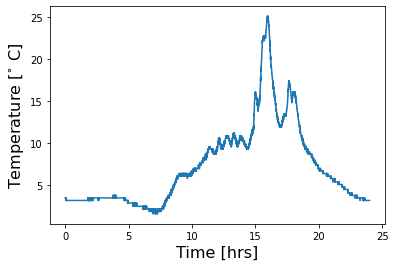

In [ ]:
# Another plot
plt.plot((tab2["time"] - time0) / 3600, tab2["temp"])
plt.xlabel("Time [hrs]", fontsize=16)
plt.ylabel(r"Temperature [$^{\circ}$ C]", fontsize=16)
# plt.loglog()

# There be Dragons
(this section hasn't been checked yet - may blow up)

In [ ]:
# Read the Arduino data table
tab4 = pd.read_table(fnames[-1], names=("a", "b"))

In [ ]:
# Check it out
tab4

,a,b
0,START,NaN
1,3.17 light volts | FREQ: 0,0.67 temp volts; 16.89 degrees C; 62.41 degrees F
2,3.17 light volts | FREQ: 0,0.67 temp volts; 16.89 degrees C; 62.41 degrees F
3,3.17 light volts | FREQ: 0,0.66 temp volts; 16.41 degrees C; 61.53 degrees F
4,3.17 light volts | FREQ: 0,0.67 temp volts; 17.38 degrees C; 63.29 degrees F
...,...,...
1956,0.74 light volts | FREQ: 752,0.51 temp volts; 0.78 degrees C; 33.41 degrees F
1957,0.74 light volts | FREQ: 749,0.51 temp volts; 0.78 degrees C; 33.41 degrees F
1958,0.74 light volts | FREQ: 748,0.51 temp volts; 0.78 degrees C; 33.41 degrees F
1959,0.73 light volts | FREQ: 744,0.51 temp volts; 0.78 degrees C; 33.41 degrees F


In [ ]:
# Split it to put it in csv format
data2 = dict()
keys = ["voltage_light", "freq", "voltage_temp", "temp_c", "temp_f"]
for key in keys:
    data2[key] = []
for row in tab4["a"].values[1:]:
    data2[keys[0]].append(float(row.split()[0]))
    data2[keys[1]].append(float(row.split()[-1]))

In [ ]:
for row in tab4["b"].values[1:]:
    vals = row.split(";")
    for i, val in enumerate(vals):
        data2[keys[i + 2]].append(float(val.split()[0]))

In [ ]:
# Dump everything in tab5 as astropy.table.Table
tab5 = astropy.table.Table(data2)

In [ ]:
# Write the arduino data in a CSV file
tab5.write("Feb6_2020_data_Arduino.csv", format="ascii.csv", overwrite=True)

Text(0, 0.5, 'Frequency [Hz]')

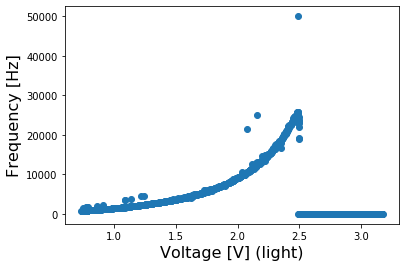

In [ ]:
# Check some of the quantities
plt.scatter(tab5["voltage_light"], tab5["freq"])
plt.xlabel("Voltage [V] (light)", fontsize=16)
plt.ylabel("Frequency [Hz]", fontsize=16)

Text(0, 0.5, 'Temperature [$^{\\circ}$ C]')

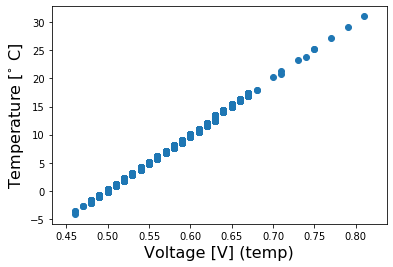

In [ ]:
plt.scatter(tab5["voltage_temp"], tab5["temp_c"])
plt.xlabel("Voltage [V] (temp)", fontsize=16)
plt.ylabel(r"Temperature [$^{\circ}$ C]", fontsize=16)

Text(0, 0.5, 'Frequency [Hz]')

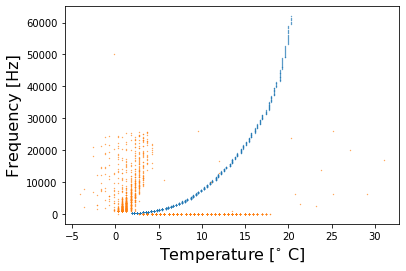

In [ ]:
# Does the data correlate? Plotting the temperature and measured frequencies
plt.scatter(tab2["temp"], tab2["freq"], s=0.1, label="SQM")
plt.scatter(tab5["temp_c"], tab5["freq"], s=0.1, label="Arduino")
plt.xlabel(r"Temperature [$^{\circ}$ C]", fontsize=16)
plt.ylabel("Frequency [Hz]", fontsize=16)

Text(0, 0.5, 'Frequency [Hz] SQM')

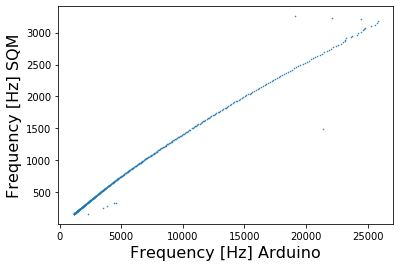

In [ ]:
# Assuming that the data-taking started at the same time,
# we subsample the Arduino's data by a factor of 2 i.e., data_arduino[::2]
# and only select up to twice the length of the data from SQM
plt.scatter(
    tab5["freq"][0:1830:2][tab5["freq"][0:1830:2] != 0],
    tab2["freq"][tab5["freq"][0:1830:2] != 0],
    s=0.3,
)
plt.xlabel("Frequency [Hz] Arduino", fontsize=16)
plt.ylabel("Frequency [Hz] SQM", fontsize=16)

(-2, 8)

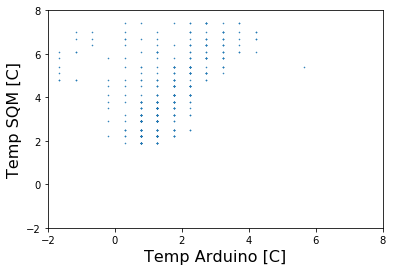

In [ ]:
# Assuming that the data-taking started at the same time,
# we subsample the Arduino's data by a factor of 2 i.e., data_arduino[::2]
# and only select up to twice the length of the data from SQM
plt.scatter(
    tab5["temp_c"][0:1830:2][tab5["freq"][0:1830:2] != 0],
    tab2["temp"][tab5["freq"][0:1830:2] != 0],
    s=0.3,
)
plt.xlabel("Temp Arduino [C]", fontsize=16)
plt.ylabel("Temp SQM [C]", fontsize=16)
plt.xlim(-2, 8)
plt.ylim(-2, 8)